# Homework 2
### Computational Network Analysis with R

## Part 0 - Dplyr (optional but recommended)

This part introduces the dplyr library which will help with the next tasks. Execute the prewritten next cell to load the dataframe into the variable df. 

In [1]:
# read the csv into a dataframe
path <- "data/msleep_ggplot2.csv"
df <- read.csv(path)

# show the head of the dataframe
head(df)

name      genus  vore        order conservation
1                    Cheetah   Acinonyx carni    Carnivora           lc
2                 Owl monkey      Aotus  omni     Primates         <NA>
3            Mountain beaver Aplodontia herbi     Rodentia           nt
4 Greater short-tailed shrew    Blarina  omni Soricomorpha           lc
5                        Cow        Bos herbi Artiodactyla domesticated
6           Three-toed sloth   Bradypus herbi       Pilosa         <NA>
  sleep_total sleep_rem sleep_cycle awake brainwt  bodywt
1        12.1        NA          NA  11.9      NA  50.000
2        17.0       1.8          NA   7.0 0.01550   0.480
3        14.4       2.4          NA   9.6      NA   1.350
4        14.9       2.3   0.1333333   9.1 0.00029   0.019
5         4.0       0.7   0.6666667  20.0 0.42300 600.000
6        14.4       2.2   0.7666667   9.6      NA   3.850

Dplyr has some neat functions to operate on dataframes. Lets start with something simple. 

**1.1 Install and load dplyr (`install.packages` and `library`) and  execute `filter(df, order=="Primates")`** 

In [2]:
library(dplyr) # for functions
filter(df, order=="Primates")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



name         genus  vore    order conservation sleep_total
1       Owl monkey         Aotus  omni Primates         <NA>        17.0
2           Grivet Cercopithecus  omni Primates           lc        10.0
3     Patas monkey  Erythrocebus  omni Primates           lc        10.9
4           Galago        Galago  omni Primates         <NA>         9.8
5            Human          Homo  omni Primates         <NA>         8.0
6   Mongoose lemur         Lemur herbi Primates           vu         9.5
7          Macaque        Macaca  omni Primates         <NA>        10.1
8       Slow loris     Nyctibeus carni Primates         <NA>        11.0
9       Chimpanzee           Pan  omni Primates         <NA>         9.7
10          Baboon         Papio  omni Primates         <NA>         9.4
11           Potto  Perodicticus  omni Primates           lc        11.0
12 Squirrel monkey       Saimiri  omni Primates         <NA>         9.6
   sleep_rem sleep_cycle awake brainwt bodywt
1        1.8          NA   7.0  0.0155  0.480
2        0.7          NA  14.0      NA  4.750
3        1.1          NA  13.1  0.1150 10.000
4        1.1   0.5500000  14.2  0.0050  0.200
5        1.9   1.5000000  16.0  1.3200 62.000
6        0.9          NA  14.5      NA  1.670
7        1.2   0.7500000  13.9  0.1790  6.800
8         NA          NA  13.0  0.0125  1.400
9        1.4   1.4166667  14.3  0.4400 52.200
10       1.0   0.6666667  14.6  0.1800 25.235
11        NA          NA  13.0      NA  1.100
12       1.4          NA  14.4  0.0200  0.743

We can see that only the rows where the order is "Primates" are selected. This syntax is much more readable than the previous approach with masking: 

``
Pre:  df[df$order == "Primates",]
Post: filter(df, order == 'Primates')
``

To select a column we use the `select` command.

**1.2 Execute "`head(select(df, name))`"**

In [3]:
head(select(df, name))

name
1                    Cheetah
2                 Owl monkey
3            Mountain beaver
4 Greater short-tailed shrew
5                        Cow
6           Three-toed sloth

We can filter and select multiple columns and rows by adding them one after another with a comma:
``
filter(df, order == "Primates", sleep_total > 10)
or
select(df, name, order)
``

**1.3 We learn now the piping in dplyr. Execute "`filter(df, order=="Primates") %>% select(name)` and explain what the result is."

In [4]:
filter(df, order=="Primates") %>% select(name)

name
1       Owl monkey
2           Grivet
3     Patas monkey
4           Galago
5            Human
6   Mongoose lemur
7          Macaque
8       Slow loris
9       Chimpanzee
10          Baboon
11           Potto
12 Squirrel monkey

*Answer:* Als braver Datenbankler sage ich:

Selektion und dann Projektion der Daten aus dem Table:

`Relationale Algebra: Proj_{name}(Sel_{order="Primates"}(df))`

Example of another command:

``
filter(df, order=="Primates") %>% select(sleep_total) %>% unlist %>% mean
``

This command reduces the data to all Primates, selects the column sleep_total, converts it from a data frame to a vector and then takes the mean on it.


*We can further chain the results as long as we wish. There are many more commands to use with dplyr:* https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html

**1.4 Get all Carnivores, get only the columns name and bodywt and rename the column with bodywt to "bodyweight"**

In [5]:
filter(df, order=="Primates") %>% select(sleep_total) %>% unlist %>% mean

[1] 10.5

In [6]:
names(df)[names(df)=="bodywt"] <- "bodyweight"
filter(df, vore=="carni") %>% select(name,bodyweight)

name bodyweight
1                     Cheetah     50.000
2           Northern fur seal     20.490
3                         Dog     14.000
4        Long-nosed armadillo      3.500
5                Domestic cat      3.300
6                 Pilot whale    800.000
7                   Gray seal     85.000
8        Thick-tailed opposum      0.370
9                  Slow loris      1.400
10 Northern grasshopper mouse      0.028
11                      Tiger    162.564
12                     Jaguar    100.000
13                       Lion    161.499
14               Caspian seal     86.000
15            Common porpoise     53.180
16       Bottle-nosed dolphin    173.330
17                      Genet      2.000
18                 Arctic fox      3.380
19                    Red fox      4.230

## Part 1 - Thinking about data

A network can be build in a lot of different ways, the data is rarely in format which can be called a network.

In [7]:
# to visualize the data
df <- read.csv2('data/dfg_full.csv')
udf <- unique(df) 
head(udf)

project_id year
1      268879 1995
3      268879 1995
5      268879 1995
7      268879 1995
9      268879 1995
11     268879 1995
                                                                                                                            name
1  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
3  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
5  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
7  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
9  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
11 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
                                 address                         person_name
1        UniversitÃ¤tsklinikum TÃ¼bingen      Professor Dr. Karl-Artur Kovar
3        UniversitÃ¤tsklinikum TÃ¼bingen        Professor Dr. Volker Schurig
5        UniversitÃ¤tsklinikum TÃ¼bingen Professor Dr. Bernhard Koppenhoefer
7        UniversitÃ¤tsklinikum TÃ¼bingen       Professor Dr. Hartmut Liebich
9  Eberhard-Karls-UniversitÃ¤t TÃ¼bingen       Professor Dr. Peter Grathwohl
11       UniversitÃ¤tsklinikum TÃ¼bingen   Professor Dr. Hartmut B. Stegmann
                                                                                                                    project_name
1  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
3  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
5  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
7  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
9  GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
11 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
                          discipline_name
1  Analytik, Methodenentwicklung (Chemie)
3  Analytik, Methodenentwicklung (Chemie)
5  Analytik, Methodenentwicklung (Chemie)
7  Analytik, Methodenentwicklung (Chemie)
9  Analytik, Methodenentwicklung (Chemie)
11 Analytik, Methodenentwicklung (Chemie)

**Tasks:**

1. Look at the dfg_full.csv data, understand what the data means
2. Switch your mode of thinking from relational data to network. What fields have a connection with each other?
3. Think in terms of, what can be nodes, what can be connections (edges). When are nodes connected?
4. Find and describe 3 networks which can be extracted from the data. There exist probably around 10, if not more, different networks.

**Network 1:**

`Persons (nodes) that work in projects with the same project_id (edges).`

- Entity type: Persons::varchar
- Relation: working in the same project::varchar

**Network 2:**

`Institutes (nodes) and their cooperations in projects (edges).`

- Entity type: Institutes::varchar
- Relation: cooperating in projects::varchar

**Network 3:**

`Project disciplines (nodes) in the same year (edges).`

- Entity type: Project disciplines::varchar
- Relation: in the same year::date

## Part 3 - Data Manipulation and Network Building

Having the data alone is not enough. After finding a desirable network to analyze the data must be converted and formatted to a standardized network format.

**3.1 List the three different ways to describe a network that we have learned in the lecture and shortly explain how the data is structured.**

Answer:

1. $\text{Adjacency matrix of a graph }G=(V,E) \text{ consists of a }|V| \times |V| \text{ matrix A where }A_{uv} = 1 \text{, if G has an u-v edge }; A_{uv} = 0 \text{, otherwise.}$

2. $\text{Adjacency list representation of a graph }G = (V , E)\text{ contains an array of vertices –
lets call it }Adj\\ \text{For each vertex }u \in V \text{, the adjacency list }Adj[u]\text{ contains all adjacent vertices v such that there is an edge }(u,v) \in E.$

3. $\text{Vertex and edge list}$

**3.2 Read dfg_full.csv and display the data with head and two rows.**

In [8]:
# read the csv into a dataframe
path <- "data/dfg_full.csv"
dfgfull <- read.csv2(path)
names(dfgfull)

# show the head of the dataframe
head(dfgfull, n=2)

[1] "project_id"      "year"            "name"            "address"        
[5] "person_name"     "project_name"    "discipline_name"

project_id year
1     268879 1995
2     268879 1995
                                                                                                                           name
1 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
2 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
                          address                    person_name
1 UniversitÃ¤tsklinikum TÃ¼bingen Professor Dr. Karl-Artur Kovar
2 UniversitÃ¤tsklinikum TÃ¼bingen Professor Dr. Karl-Artur Kovar
                                                                                                                   project_name
1 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
2 GRK 8:Â  Quantitative Analyse und Charakterisierung pharmazeutisch und biochemisch relevanter Substanzen (Analytische Chemie)
                         discipline_name
1 Analytik, Methodenentwicklung (Chemie)
2 Analytik, Methodenentwicklung (Chemie)

**3.3 Throw away any data which does not has the address: `Freie Universität Berlin`**

In [9]:
head(dfgfull[dfgfull$address == "Freie Universität Berlin",])

project_id year                      name                   address
400     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
409     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
411     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
414     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
418     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
419     269443 1995 GRK 66:Â  Das neue Europa Freie UniversitÃ¤t Berlin
                       person_name              project_name
400 Professor Dr. Ulrich K. PreuÃ GRK 66:Â  Das neue Europa
409     Professor Dr. Helmut Weber GRK 66:Â  Das neue Europa
411 Professor Dr. Helga Haftendorn GRK 66:Â  Das neue Europa
414     Professor Dr. Rainer MÃ¼nz GRK 66:Â  Das neue Europa
418    Professor Dr. Ludolf Herbst GRK 66:Â  Das neue Europa
419 Professor Dr. Bernd Henningsen GRK 66:Â  Das neue Europa
         discipline_name
400 Sozialwissenschaften
409 Sozialwissenschaften
411 Sozialwissenschaften
414 Sozialwissenschaften
418 Sozialwissenschaften
419 Sozialwissenschaften

**3.4 Convert and reformat the data frame to one of the listed ways in 3.1.**

In [10]:
library(igraph)

pid <- c(dfgfull$project_id)

pname.v <- dfgfull$person_name
pname.f <- factor(c(dfgfull$person_name))

d1 <- unique(data.frame(pid,pname.f,pname.v))
d2 <- unique(data.frame(pid,pname.f,pname.v))

# inner join
ij <- merge(d2,d1, all = FALSE)

# create a graph object g
g <- graph.data.frame(ij[,1:2])

# adjacency list from graph g -> adj
adj <- get.adjacency(g)


Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    %>%, as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
In graph.data.frame(ij[, 1:2]): In `d' `NA' elements were replaced with string "NA"Warning message:
In `[<-.factor`(`*tmp*`, thisvar, value = "NA"): invalid factor level, NA generated

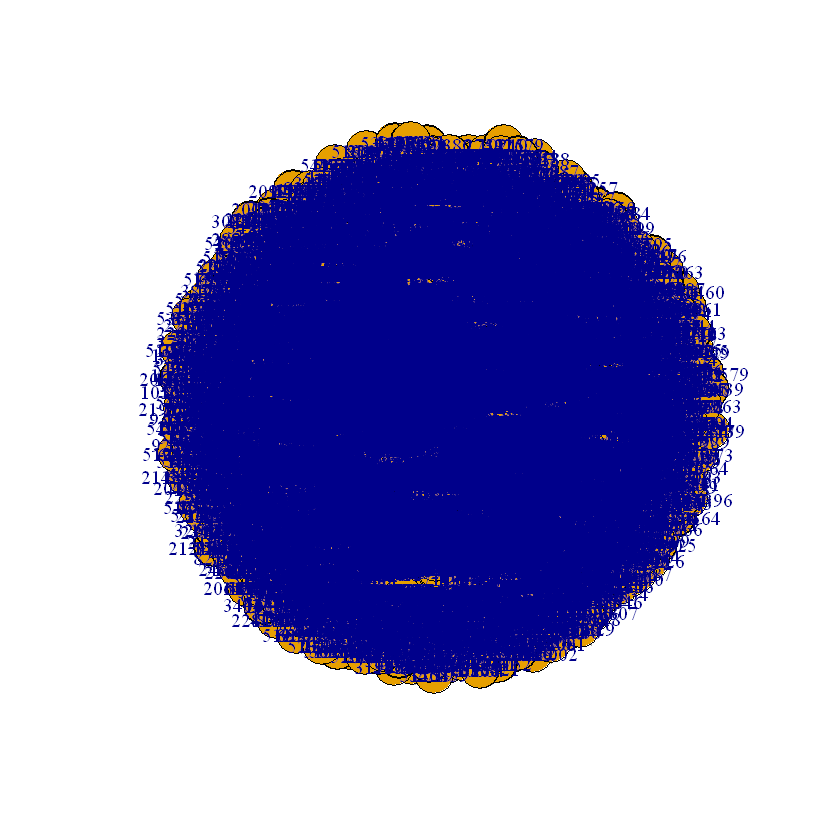

In [11]:
# plot the resulting graph g
plot.igraph(g)

## Part 4 - Finishing touch

Handing in the assignment requires following steps:

**Checking if the code works if sequentielly executed**
- restart the kernel to clear the current workspace variables
- run all cells (menu: cell - runall)

**Handin**
- Save current progress ('ctrl + s')
- Commit and push to your own fork
- Dance

![alt text](./img/dance.jpg "Dance!")